## Terrestrial Biosphere Carbon Cycle Model


* Biomass (g C / m^2)
* GPP
* NPP
* NCP = NEE
* R_H
* R_H_g

The data files are climatological monthly data interpolated onto a 1x1 degree grid

In [181]:
#!/usr/bin/env python
import os #functions for working with file system
import sys
import glob
from pylab import *

import scipy as sp
import numpy as np
import numpy.ma as ma #masked arrays
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#plotting
import seaborn as sns

In [182]:
# print the current working directory
os.getcwd()
# change working directory to where input files are
os.chdir('/Users/Deepa/Documents/12.349:12.849/Terrestrial Biosphere/monthly-input-data')
# Backslash on Windows and Forward Slash on OS X and Linux

In [183]:
# read in the lat and lon coordinates of gridded data
lat = pd.read_table('latitudegrid.txt', header=None, skiprows=1)
lon = pd.read_table('longitudegrid.txt', header=None, skiprows=1)

lat, lon = np.meshgrid(lat.T,lon.T) #create meshgrid for plotting 

area = pd.read_table('area.txt', header=None)

In [184]:
# import monthly avg climatology data as a numpy array

# use glob.glob to get an unordered list of filenames ('prefix_*.txt')
#print (glob.glob('*.txt')) #print all files in directory
T_files = glob.glob('SurfTair_*.txt')
precip_files = glob.glob('Precip_*.txt')
sw_files = glob.glob('SurfSW_*.txt')

# sort files
T_files.sort()
precip_files.sort()
sw_files.sort()

# import monthly avg climatology data as a numpy array and mask missing values
#surface air temp (C)
T = ma.masked_greater([np.loadtxt(f) for f in T_files], 1e36) 
#precipitation (cm/month)
precip = ma.masked_greater([np.loadtxt(f) for f in precip_files], 1e36) 
#convert from (cm/month) to (m/yr)
precip = precip * 12.0 / 100.0 
 #incident short wave radiation - visible light (W/m2)
sw = ma.masked_greater([np.loadtxt(f) for f in sw_files], 1e36)

# test plot
#plt.contourf(lon,lat,T[6].T) #test

#print(precip_files)
#print(lat.T.shape, lon.T.shape, T_Jan.shape)
#print(T)

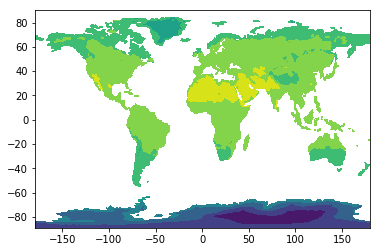

In [185]:
plt.contourf(lon,lat,T[6].T)

[(-90, 90),
 Text(0,0.5,'Latitude'),
 (-180, 180),
 Text(0.5,0,'Longitude'),
 Text(0.5,1,'Jan Mean Suface Air Temperature (C)')]

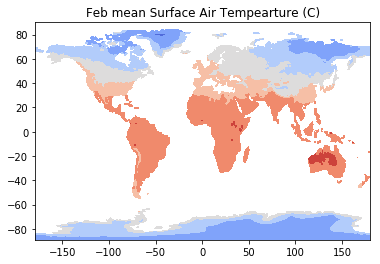

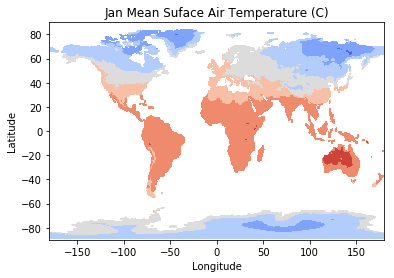

In [186]:
# Plot monthly mean
plt.contourf(lon,lat, T[1].T, cmap = cm.coolwarm)
plt.title('Feb mean Surface Air Tempearture (C)')
#plt.pcolormesh(lon, lat, T_Jan.T)

fig, ax = plt.subplots()
J = ax.contourf(lon, lat, T[0].T, cmap=cm.coolwarm)
ax.set(xlim=[-180, 180], ylim=[-90,90],
       xlabel='Longitude', ylabel='Latitude',
       title='Jan Mean Suface Air Temperature (C)')

[(-90, 90),
 Text(0,0.5,'Latitude'),
 (-180, 180),
 Text(0.5,0,'Longitude'),
 Text(0.5,1,'Jan SW (W/m2)')]

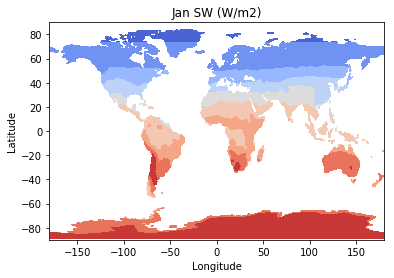

In [208]:
#create landmask based on surface air T
landmask = np.ma.masked_where(T[0]>1e36, T[0])

#apply landmask on monthly sw data -- to only plot terrestrial data
sw_mask_0 = np.ma.masked_where(np.ma.getmask(landmask), sw[0]) #applies landmask on monthly[n] sw data

fig, ax = plt.subplots()
J = ax.contourf(lon, lat, sw_mask_0.T, cmap=cm.coolwarm)
ax.set(xlim=[-180, 180], ylim=[-90,90],
       xlabel='Longitude', ylabel='Latitude',
       title='Jan SW (W/m2)')

In [198]:
T[5].shape

(180, 360)

In [231]:
type(T)
T[1].shape

(180, 360)

In [229]:
#import itertools
#test = [sum(i) for i in zip(*T)]
#test_annual = [test / 12 for i in test]
#T_annual = test/12

#T_array = np.asarray(T_annual)
T_annual = np.true_divide(T, 12)


(12, 180, 360)

In [199]:
test = np.sum(T)/12
test.shape
#T_annual = sum(i) for i in zip(*T)

T_annual.shape
#T.shape

AttributeError: 'generator' object has no attribute 'shape'

In [157]:
#calculate annual mean
test = np.mean(T, axis=0)
test.T.shape

#plt.contourf(lon,lat,test.T) #test

test = T/12
test.shape

#T = np.asarray(T, dtype=np.float32) #convert from list to array
#T.shape
#T[:,0].shape #first month



(12, 180, 360)

In [ ]:
# import monthly avg climatology data as a numpy array
T_Jan = np.loadtxt('SurfTair_01.txt')
T_Jan.shape
T_Jan = ma.masked_greater(T_Jan, 1e36) #mask missing values

In [86]:
# Annual Mean
TT = [np.loadtxt(f) for f in T_files] #list of lists, collection of monthly means
len(TT) #Check that = 12

TT[1] #access first list (January)

TTT = ma.masked_greater([np.loadtxt(f) for f in T_files], 1e36)

T_ar = np.asarray(TTT, dtype=np.float32)

T_ar.shape

(12, 180, 360)

In [52]:
T = [np.loadtxt(f) for f in T_files] #creates a list of the monthly mean data
len(T) #check size of list

12

In [55]:
next(iter(your_list), None)
T_annual = T

TypeError: 'list' object is not callable